## `Name` : Ayush Panchal
## `Roll No` : P24DS013

### 1. Use the following values to calculate various distance measures for them and prepare a visualization to compare them for each scenario and describe their sensitivity with given values

### 1. Use the following values to calculate various distance measures for them and prepare a visualization to compare them for each scenario and describe their sensitivity with given values.

a. {3000, 2000, 1000}, {4000, 5000, 6000}\
b. {300, 200, 100}, {400, 500, 600}\
c. {30, 20, 10}, {40, 50, 60}\
d. {3, 2, 1}, {4, 5, 6}\
e. {0.3, 0.2., 0.1}, {0.4, 0.5, 0.6}\
f. {0.03, 0.02, 0.01}, {0.04, 0.05, 0.06}\
g. {0.003, 0.002, 0.001}, {0.004, 0.005, 0.006}

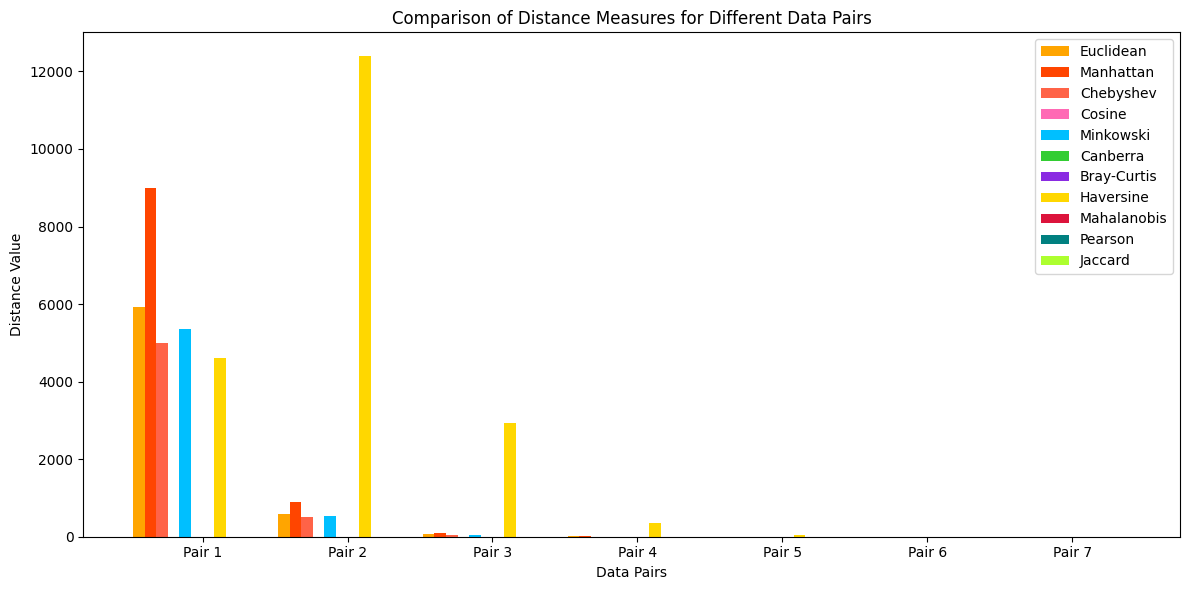

In [13]:
import numpy as np
import matplotlib.pyplot as plt

data_pairs = [
    ([3000, 2000, 1000], [4000, 5000, 6000]),
    ([300, 200, 100], [400, 500, 600]),
    ([30, 20, 10], [40, 50, 60]),
    ([3, 2, 1], [4, 5, 6]),
    ([0.3, 0.2, 0.1], [0.4, 0.5, 0.6]),
    ([0.03, 0.02, 0.01], [0.04, 0.05, 0.06]),
    ([0.003, 0.002, 0.001], [0.004, 0.005, 0.006])
]

def euclidean_distance(u, v):
    return np.sqrt(sum((ui - vi) ** 2 for ui, vi in zip(u, v)))

def manhattan_distance(u, v):
    return sum(abs(ui - vi) for ui, vi in zip(u, v))

def chebyshev_distance(u, v):
    return max(abs(ui - vi) for ui, vi in zip(u, v))

def cosine_distance(u, v):
    dot_product = sum(ui * vi for ui, vi in zip(u, v))
    magnitude_u = np.sqrt(sum(ui ** 2 for ui in u))
    magnitude_v = np.sqrt(sum(vi ** 2 for vi in v))
    return 1 - (dot_product / (magnitude_u * magnitude_v))

def minkowski_distance(u, v, p=3):
    return np.power(sum(abs(ui - vi) ** p for ui, vi in zip(u, v)), 1/p)

def canberra_distance(u, v):
    return sum(abs(ui - vi) / (abs(ui) + abs(vi)) for ui, vi in zip(u, v) if (ui + vi) != 0)

def bray_curtis_distance(u, v):
    return sum(abs(ui - vi) for ui, vi in zip(u, v)) / sum(abs(ui + vi) for ui, vi in zip(u, v))

def haversine_distance(u, v):
    R = 6371
    lat1, lon1 = u
    lat2, lon2 = v
    lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

def mahalanobis_distance(u, v, cov=None):
    if cov is None:
        cov = np.cov([u, v], rowvar=False)
    diff = np.array(u) - np.array(v)
    try:
        return np.sqrt(np.dot(np.dot(diff.T, np.linalg.inv(cov)), diff))
    except np.linalg.LinAlgError:
        return np.nan  

def pearson_correlation_distance(u, v):
    u_mean = np.mean(u)
    v_mean = np.mean(v)
    numerator = sum((ui - u_mean) * (vi - v_mean) for ui, vi in zip(u, v))
    denominator = np.sqrt(sum((ui - u_mean) ** 2 for ui in u)) * np.sqrt(sum((vi - v_mean) ** 2 for vi in v))
    return 1 - (numerator / denominator)

def jaccard_distance(u, v):
    u, v = set(u), set(v)
    intersection = len(u.intersection(v))
    union = len(u.union(v))
    return 1 - intersection / union

distance_measures = {
    'Euclidean': euclidean_distance,
    'Manhattan': manhattan_distance,
    'Chebyshev': chebyshev_distance,
    'Cosine': cosine_distance,
    'Minkowski': lambda u, v: minkowski_distance(u, v, p=3),
    'Canberra': canberra_distance,
    'Bray-Curtis': bray_curtis_distance,
    'Haversine': lambda u, v: haversine_distance(u[:2], v[:2]),
    'Mahalanobis': lambda u, v: mahalanobis_distance(u, v),
    'Pearson': pearson_correlation_distance,
    'Jaccard': jaccard_distance
}

results = {name: [] for name in distance_measures.keys()}
for u, v in data_pairs:
    for name, dist_func in distance_measures.items():
        results[name].append(dist_func(u, v))

colors = {
    'Euclidean': '#FFA500',
    'Manhattan': '#FF4500',
    'Chebyshev': '#FF6347',
    'Cosine': '#FF69B4',
    'Minkowski': '#00BFFF',
    'Canberra': '#32CD32',
    'Bray-Curtis': '#8A2BE2',
    'Haversine': '#FFD700',
    'Mahalanobis': '#DC143C',
    'Pearson': '#008080',
    'Jaccard': '#ADFF2F'
}

labels = [f"Pair {i+1}" for i in range(len(data_pairs))]
x = np.arange(len(data_pairs))
width = 0.08

fig, ax = plt.subplots(figsize=(12, 6))
for i, (name, values) in enumerate(results.items()):
    ax.bar(x + i*width, values, width, label=name, color=colors[name])

ax.set_xlabel('Data Pairs')
ax.set_ylabel('Distance Value')
ax.set_title('Comparison of Distance Measures for Different Data Pairs')
ax.set_xticks(x + width * len(distance_measures) / 2)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()


### 2. Use string values as follows to calculate various distance measures for them and prepare a visualization to compare them for each scenario and describe their sensitivity with given values.
a. “1000 0000 0000 0000”, “0000 0000 0000 00001”\
b. “0000 0000 0000 0000”, “1111 1111 1111 1111”\
c. “1111 0000 0000 0000”, “0000 0000 0000 1111”

C:\Users\Ayush\AppData\Local\Temp\ipykernel_16600\195658671.py:17: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - (dot_product / (norm_vec1 * norm_vec2))


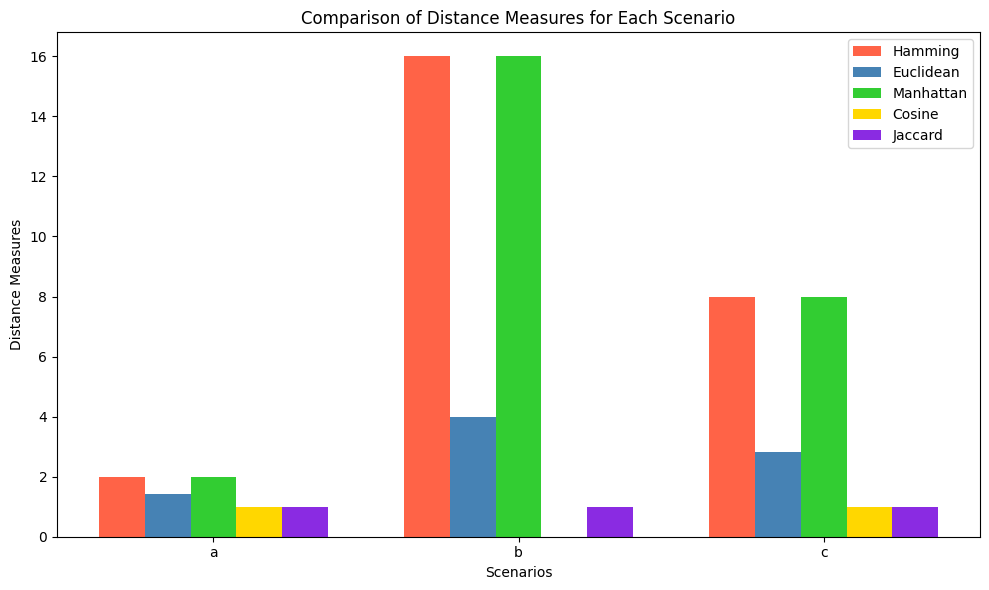

In [6]:

def binary_string_to_vector(s):
    return [int(char) for char in s.replace(" ", "")]

def manual_hamming(vec1, vec2):
    return sum(el1 != el2 for el1, el2 in zip(vec1, vec2))

def manual_euclidean(vec1, vec2):
    return np.sqrt(sum((el1 - el2) ** 2 for el1, el2 in zip(vec1, vec2)))

def manual_manhattan(vec1, vec2):
    return sum(abs(el1 - el2) for el1, el2 in zip(vec1, vec2))

def manual_cosine(vec1, vec2):
    dot_product = sum(el1 * el2 for el1, el2 in zip(vec1, vec2))
    norm_vec1 = np.sqrt(sum(el1 ** 2 for el1 in vec1))
    norm_vec2 = np.sqrt(sum(el2 ** 2 for el2 in vec2))
    return 1 - (dot_product / (norm_vec1 * norm_vec2))

def manual_jaccard(vec1, vec2):
    intersection = sum(el1 == 1 and el2 == 1 for el1, el2 in zip(vec1, vec2))
    union = sum(el1 == 1 or el2 == 1 for el1, el2 in zip(vec1, vec2))
    return 1 - (intersection / union) if union != 0 else 1

strings = [
    ("1000 0000 0000 0000", "0000 0000 0000 0001"),  
    ("0000 0000 0000 0000", "1111 1111 1111 1111"), 
    ("1111 0000 0000 0000", "0000 0000 0000 1111")   
]
hamming_distances = []
euclidean_distances = []
manhattan_distances = []
cosine_distances = []
jaccard_distances = []

for s1, s2 in strings:
    vec1 = binary_string_to_vector(s1)
    vec2 = binary_string_to_vector(s2)
    
    hamming_distances.append(manual_hamming(vec1, vec2))
    euclidean_distances.append(manual_euclidean(vec1, vec2))
    manhattan_distances.append(manual_manhattan(vec1, vec2))
    cosine_distances.append(manual_cosine(vec1, vec2))
    jaccard_distances.append(manual_jaccard(vec1, vec2))

scenarios = ['a', 'b', 'c']

metrics = ['Hamming', 'Euclidean', 'Manhattan', 'Cosine', 'Jaccard']
data = [hamming_distances, euclidean_distances, manhattan_distances, cosine_distances, jaccard_distances]

colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#8A2BE2']

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.15
x = np.arange(len(scenarios))

for i, (metric, color) in enumerate(zip(metrics, colors)):
    ax.bar(x + i * bar_width, data[i], width=bar_width, label=metric, color=color)

ax.set_xlabel('Scenarios')
ax.set_ylabel('Distance Measures')
ax.set_title('Comparison of Distance Measures for Each Scenario')
ax.set_xticks(x + bar_width * 2)
ax.set_xticklabels(scenarios)
ax.legend()

plt.tight_layout()
plt.show()


### 3. Implement the Levenshtein Distance Matrix to transform Your name into Your Friend’s Name.

Levenshtein Distance Matrix:
[[0 1 2 3 4 5]
 [1 1 2 3 4 5]
 [2 2 2 3 4 5]
 [3 3 3 3 4 5]
 [4 4 4 4 3 4]
 [5 5 5 5 4 3]]


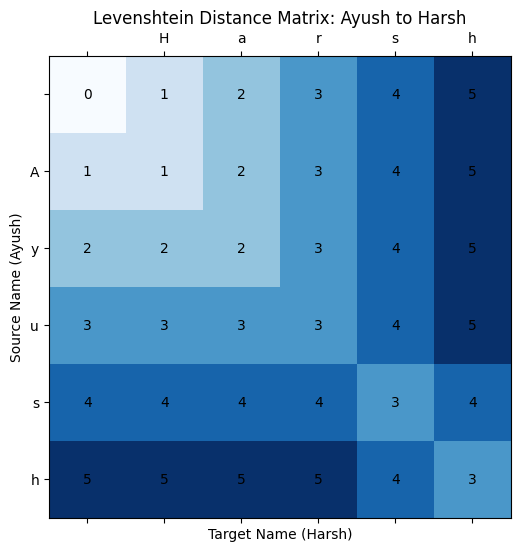

In [4]:
def levenshtein_distance_matrix(str1, str2):
    len_str1 = len(str1) + 1
    len_str2 = len(str2) + 1

    matrix = np.zeros((len_str1, len_str2), dtype=int)

    for i in range(len_str1):
        matrix[i][0] = i
    for j in range(len_str2):
        matrix[0][j] = j

    for i in range(1, len_str1):
        for j in range(1, len_str2):
            cost = 0 if str1[i-1] == str2[j-1] else 1
            matrix[i][j] = min(matrix[i-1][j] + 1,      
                               matrix[i][j-1] + 1,      
                               matrix[i-1][j-1] + cost) 

    return matrix

name1 = "Ayush"
name2 = "Harsh"

matrix = levenshtein_distance_matrix(name1, name2)

print("Levenshtein Distance Matrix:")
print(matrix)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(matrix, cmap=plt.cm.Blues)

ax.set_xticks(np.arange(len(name2) + 1))
ax.set_yticks(np.arange(len(name1) + 1))
ax.set_xticklabels([''] + list(name2))
ax.set_yticklabels([''] + list(name1))

for i in range(len(name1) + 1):
    for j in range(len(name2) + 1):
        ax.text(j, i, str(matrix[i, j]), va='center', ha='center')

plt.title(f"Levenshtein Distance Matrix: {name1} to {name2}")
plt.xlabel("Target Name (Harsh)")
plt.ylabel("Source Name (Ayush)")
plt.show()
